In [1]:
import tensorflow as tf
print(tf.__version__)
import tensorflow_datasets as tfds
imdb, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)

2.1.0


In [0]:
train_data, test_data = imdb['train'], imdb['test']

In [0]:
tokenizer = info.features['text'].encoder

In [4]:
print(tokenizer.subwords)

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_', 't_', 'with_', 'for_', '.<', 'on_', 'but_', 'movie_', ' (', 'are_', 'his_', 'have_', 'film_', 'not_', 'ing_', 'be_', 'ed_', 'you_', ' "', 'it', 'd_', 'an_', 'he_', 'by_', 'at_', 'one_', 'who_', 'y_', 'from_', 'e_', 'or_', 'all_', 'like_', 'they_', '" ', 'so_', 'just_', 'has_', ') ', 'her_', 'about_', 'out_', 'This_', 'some_', 'ly_', 'movie', 'film', 'very_', 'more_', 'It_', 'would_', 'what_', 'when_', 'which_', 'good_', 'if_', 'up_', 'only_', 'even_', 'their_', 'had_', 'really_', 'my_', 'can_', 'no_', 'were_', 'see_', 'she_', '? ', 'than_', '! ', 'there_', 'get_', 'been_', 'into_', ' - ', 'will_', 'much_', 'story_', 'because_', 'ing', 'time_', 'n_', 'we_', 'ed', 'me_', ': ', 'most_', 'other_', 'don', 'do_', 'm_', 'es_', 'how_', 'also_', 'make_', 'its_', 'could_', 'first_', 'any_', "' ", 'people_', 'great_', 've_', 'ly', 'er_', 'made_', 'r_', 'B

In [5]:
sample_string = "Tensorflow, from basics to mastery"

tokenized_string = tokenizer.encode(sample_string)
print("Tokenized string is {}".format(tokenized_string))

original_string = tokenizer.decode(tokenized_string)
print('the original string: {}'.format(original_string))

Tokenized string is [6307, 2327, 2934, 2, 48, 4249, 4429, 7, 2652, 8050]
the original string: Tensorflow, from basics to mastery


In [6]:
for i in tokenized_string:
  print("{} ----> {}".format(i, tokenizer.decode([i])))

6307 ----> Ten
2327 ----> sor
2934 ----> flow
2 ----> , 
48 ----> from 
4249 ----> basi
4429 ----> cs 
7 ----> to 
2652 ----> master
8050 ----> y


In [7]:
embedding_dim = 64
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
global_average_pooling1d (Gl (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 524,237
Trainable params: 524,237
Non-trainable params: 0
_________________________________________________________________


In [8]:
# only if error occur at fitting te model
BUFFER_SIZE = 1000

train_batches = (
    train_data
    .shuffle(BUFFER_SIZE)
    .padded_batch(32, train_data.output_shapes))

test_batches = (
    test_data
    .padded_batch(32,train_data.output_shapes))

for example_batch, label_batch in train_batches.take(2):
  print("Batch shape:", example_batch.shape)
  print("label shape:", label_batch.shape)

Instructions for updating:
Use `tf.compat.v1.data.get_output_shapes(dataset)`.


Instructions for updating:
Use `tf.compat.v1.data.get_output_shapes(dataset)`.


Batch shape: (32, 612)
label shape: (32,)
Batch shape: (32, 789)
label shape: (32,)


In [9]:
num_epochs = 10

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])
history = model.fit(train_batches, epochs=num_epochs, validation_data=test_batches, validation_steps=30)

Epoch 1/10
782/782 [==============================] - 20s 26ms/step - loss: 0.6110 - accuracy: 0.6845 - val_loss: 0.4769 - val_accuracy: 0.8229
Epoch 2/10
782/782 [==============================] - 17s 21ms/step - loss: 0.3551 - accuracy: 0.8706 - val_loss: 0.3743 - val_accuracy: 0.8573
Epoch 3/10
782/782 [==============================] - 19s 25ms/step - loss: 0.2662 - accuracy: 0.9056 - val_loss: 0.3419 - val_accuracy: 0.8677
Epoch 4/10
782/782 [==============================] - 17s 21ms/step - loss: 0.2268 - accuracy: 0.9162 - val_loss: 0.3439 - val_accuracy: 0.8677
Epoch 5/10
782/782 [==============================] - 17s 22ms/step - loss: 0.2009 - accuracy: 0.9284 - val_loss: 0.3423 - val_accuracy: 0.8708
Epoch 6/10
782/782 [==============================] - 17s 22ms/step - loss: 0.1807 - accuracy: 0.9366 - val_loss: 0.3526 - val_accuracy: 0.8740
Epoch 7/10
782/782 [==============================] - 17s 22ms/step - loss: 0.1632 - accuracy: 0.9428 - val_loss: 0.3708 - val_accuracy:

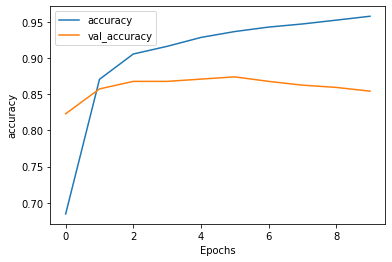

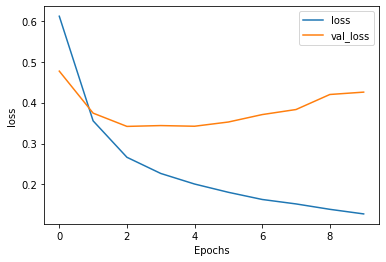

In [11]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")